<a href="https://colab.research.google.com/github/matthewpblock/ml_regression_block/blob/main/regression_block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start your notebook professionally with:

    a single top-level title
    your name (or alias)
    the date
    a brief introduction that describes the problem and the dataset.
    Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn).


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.


In [5]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics.


In [6]:
print("Missing values:")
print(df.isnull().sum())
print("\nSummary statistics:")
print(df.describe(include='all'))

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.0000

### Reflection 1: What do you notice about the dataset? Are there any data issues?

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

    Create histograms, boxplots, and count plots for categorical variables (as applicable).
    Identify patterns, outliers, and anomalies in feature distributions.
    Check for class imbalance in the target variable (as applicable).


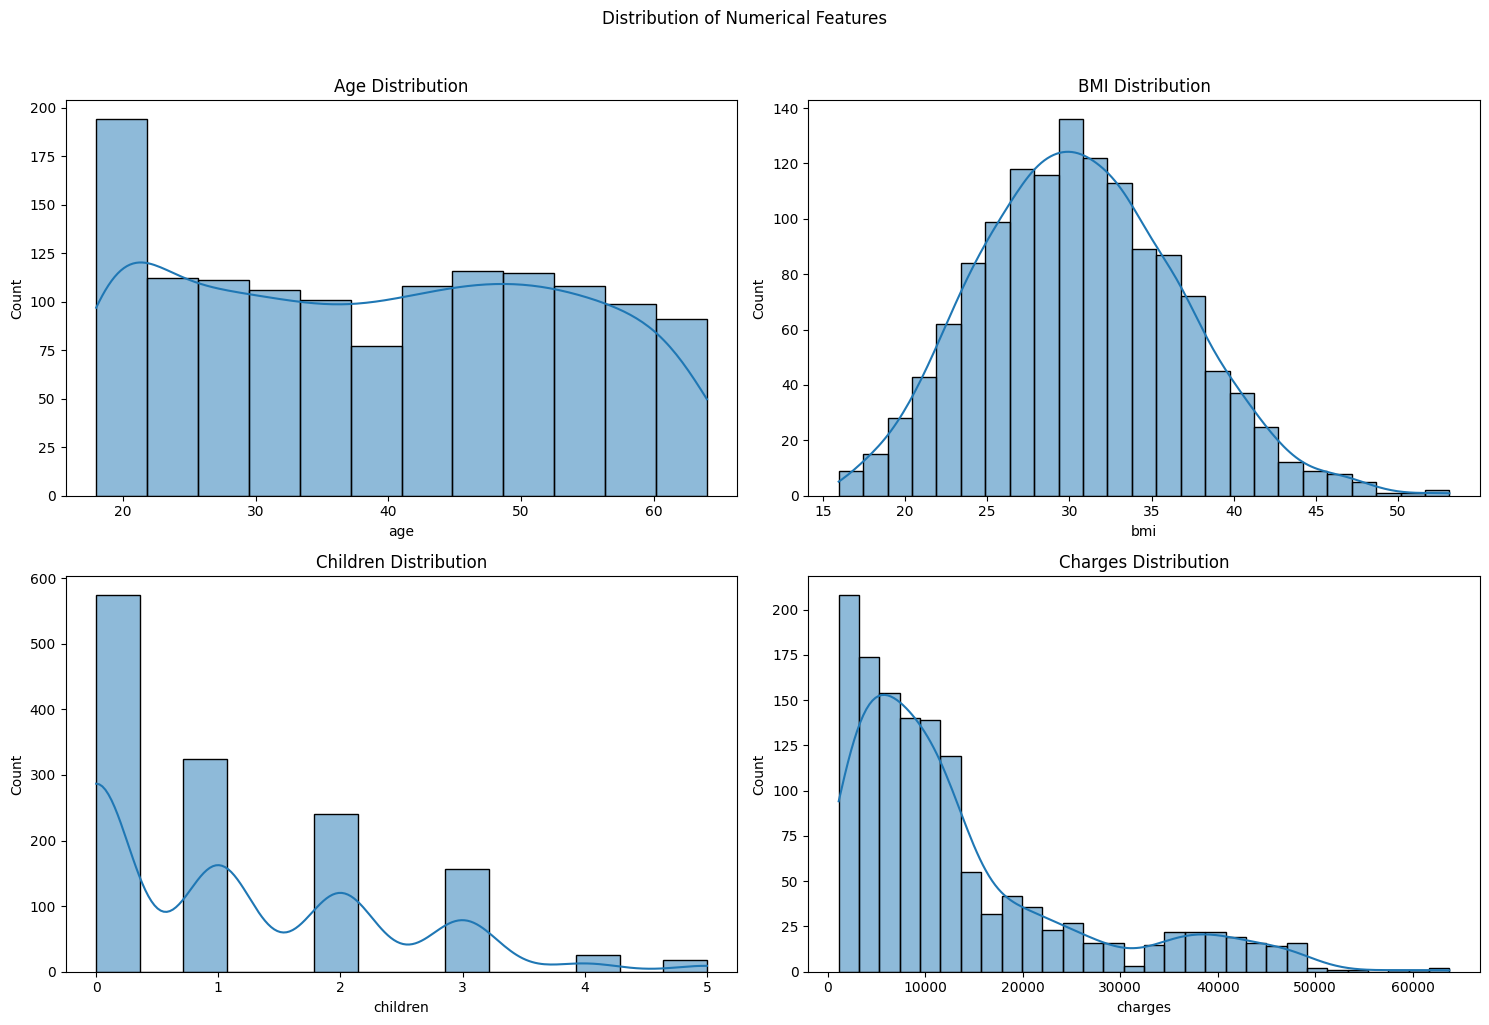

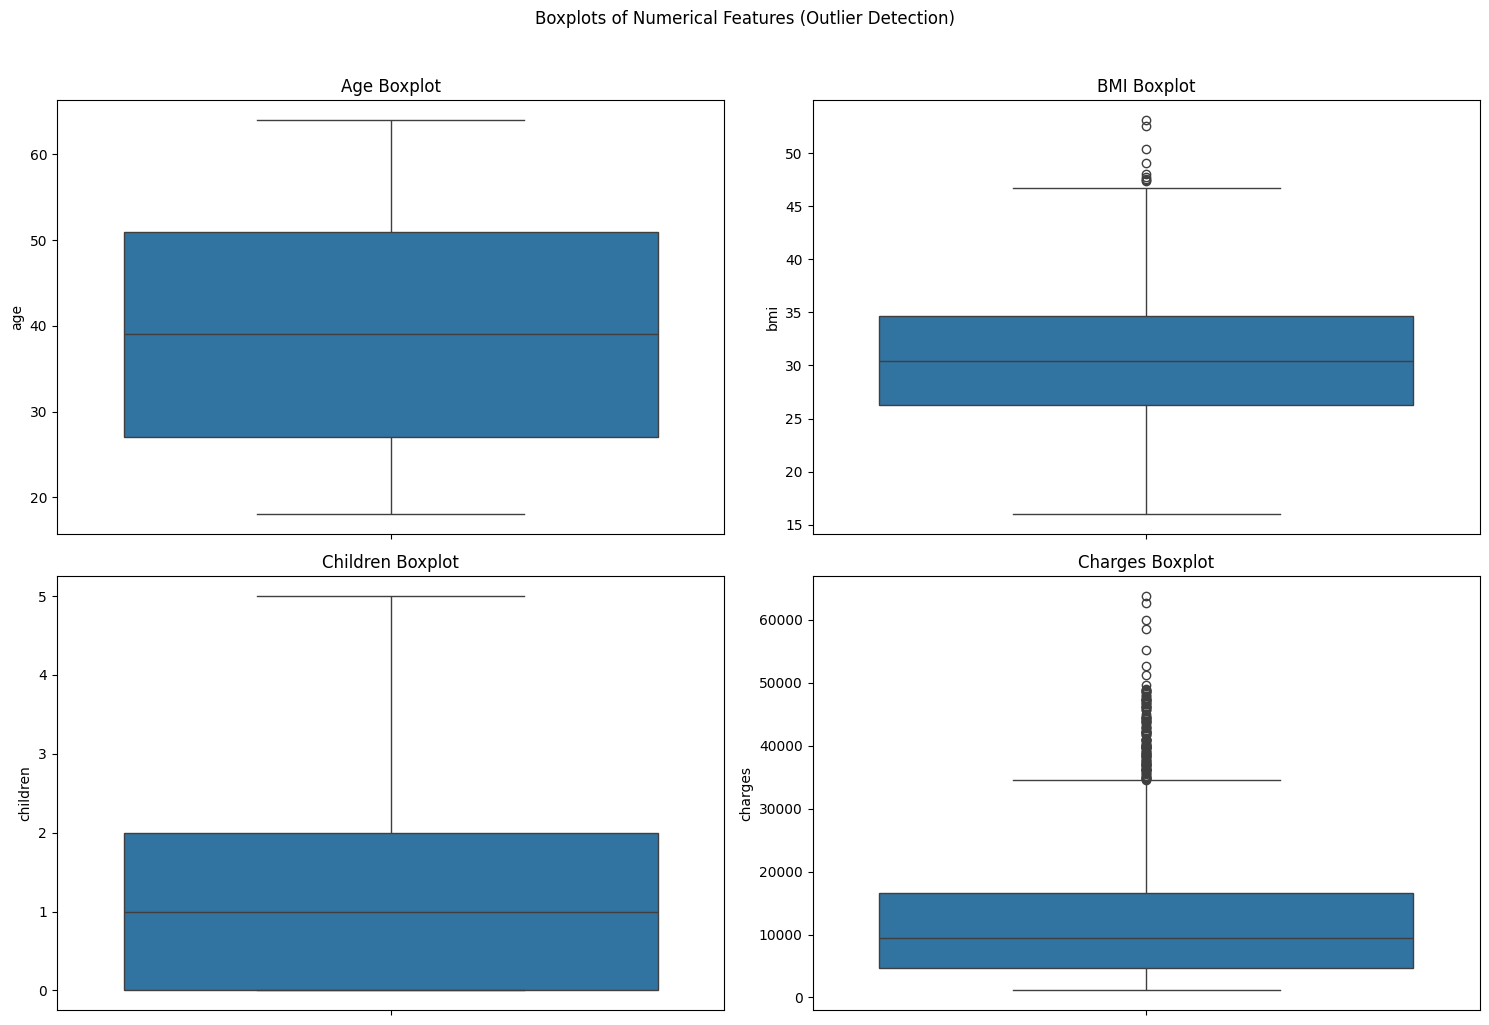

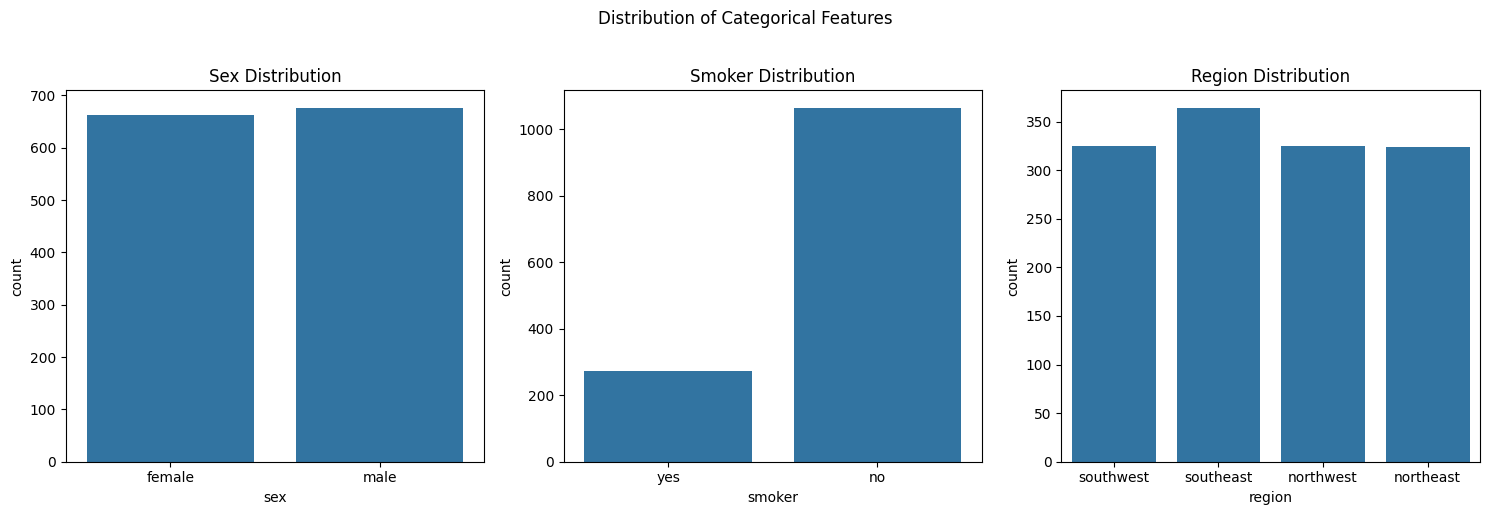

In [8]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02)

plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['children'], kde=True)
plt.title('Children Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')

plt.tight_layout()
plt.show()

# Boxplots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Features (Outlier Detection)', y=1.02)

plt.subplot(2, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Age Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['bmi'])
plt.title('BMI Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['children'])
plt.title('Children Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['charges'])
plt.title('Charges Boxplot')

plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 5))
plt.suptitle('Distribution of Categorical Features', y=1.02)

plt.subplot(1, 3, 1)
sns.countplot(x=df['sex'])
plt.title('Sex Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x=df['smoker'])
plt.title('Smoker Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x=df['region'])
plt.title('Region Distribution')

plt.tight_layout()
plt.show()

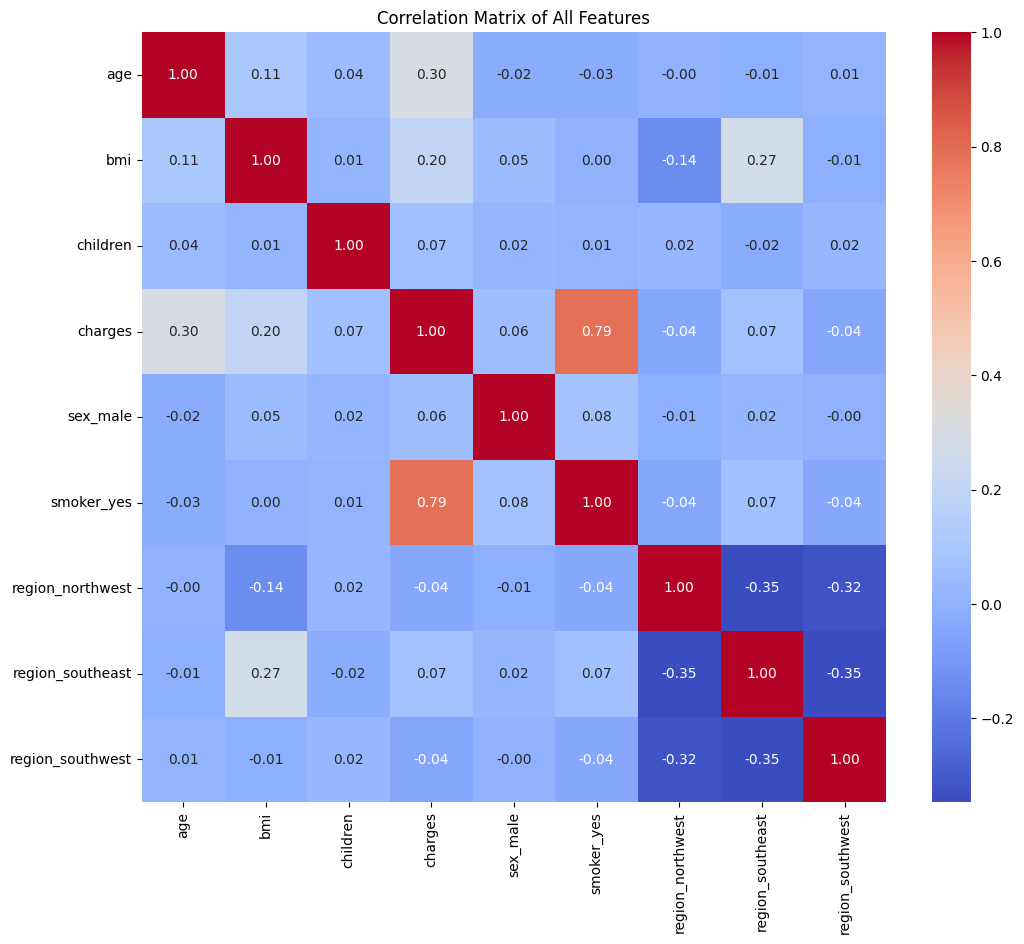

In [9]:
# Create a copy of the DataFrame to perform encoding for correlation analysis
df_encoded = df.copy()

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

### 2.2 Handle missing values and clean data

    Impute or drop missing values (as applicable).
    Remove or transform outliers (as applicable).
    Convert categorical data to numerical format using encoding (as applicable).


Original y (charges) skewness: 1.5158796580240388
Transformed y_log (log_charges) skewness: -0.09009752473024582


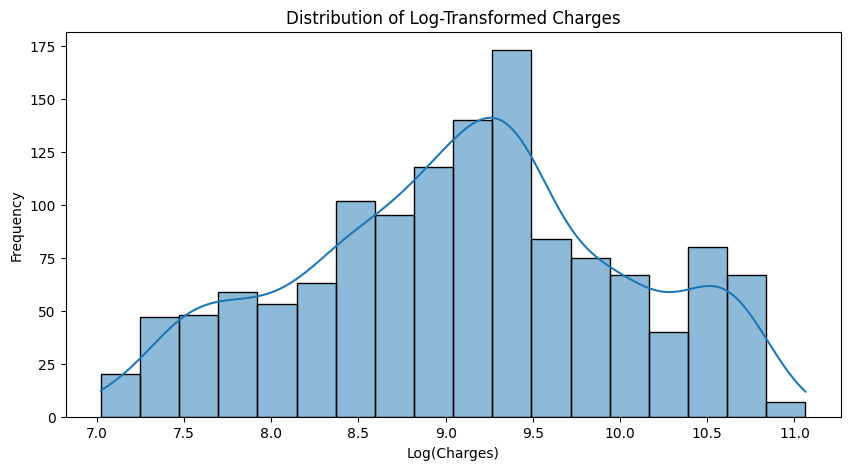


First 5 rows of transformed y:
0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64


In [11]:
# Apply log transformation to 'charges' to handle skewness and outliers
# Adding a small constant (e.g., 1) to handle potential zero values, though 'charges' doesn't have zeros here.
y_log = np.log(y)

print("Original y (charges) skewness:", y.skew())
print("Transformed y_log (log_charges) skewness:", y_log.skew())

# Visualize the transformed target variable
plt.figure(figsize=(10, 5))
sns.histplot(y_log, kde=True)
plt.title('Distribution of Log-Transformed Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.show()

# Update y to the log-transformed version for subsequent model training
y = y_log
print("\nFirst 5 rows of transformed y:")
print(y.head())

### 2.3 Feature selection and engineering

    Create new features (as applicable).
    Transform or combine existing features to improve model performance (as applicable).
    Scale or normalize data (as applicable).


In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to 'age' and 'bmi' features in X
# 'smoker_yes' is already binary (0/1 or False/True) and doesn't need scaling
# Using .loc to prevent SettingWithCopyWarning
X.loc[:, ['age', 'bmi']] = scaler.fit_transform(X[['age', 'bmi']])

print("First 5 rows of scaled X:")
print(X.head())

First 5 rows of scaled X:
   smoker_yes       age       bmi
0        True -1.438764 -0.453320
1       False -1.509965  0.509621
2       False -0.797954  0.383307
3       False -0.441948 -1.305531
4       False -0.513149 -0.292556


### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

    Select two or more input features (numerical for regression, numerical and/or categorical for classification)
    Select a target variable (as applicable)
        Regression: Continuous target variable (e.g., price, temperature).
        Classification: Categorical target variable (e.g., gender, species).
        Clustering: No target variable.
        Justify your selection with reasoning.


### 3.2 Define X and y

    Assign input features to X
    Assign target variable to y (as applicable)


In [10]:
# Define input features (X) and target variable (y)
X = df_encoded[['smoker_yes', 'age', 'bmi']]
y = df_encoded['charges']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

Shape of X: (1338, 3)
Shape of y: (1338,)

First 5 rows of X:
   smoker_yes  age     bmi
0        True   19  27.900
1       False   18  33.770
2       False   28  33.000
3       False   33  22.705
4       False   32  28.880

First 5 rows of y:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 3)
X_test shape: (268, 3)
y_train shape: (1070,)
y_test shape: (268,)


### 4.2 Train model using Scikit-Learn model.fit() method

In [15]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


### 4.3 Evalulate performance, for example:

    Regression: R^2, MAE, RMSE (RMSE has been recently updated)
    Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
    Clustering: Inertia, Silhouette Score


In [16]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.30
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.45
R-squared (R²): 0.77


### Reflection 4: How well did the model perform? Any surprises in the results?

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

### 5.3 Compare performance of all models across the same performance metrics

### Reflection 5: Which models performed better? How does scaling impact results?

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
[summary]

### 6.2 Discuss challenges faced.
[challenges]

### 6.3 If you had more time, what would you try next?
[further]

### Reflection 6: What did you learn from this project?
[reflection]